In [2]:
library(splatter)

library(scater)
library(Seurat)
library(dplyr)
library(Matrix)
# library(clues)
# library(SC3)
library(SingleCellExperiment)
dirs="/data02/tguo/batch_effect/simulate/new/"

rare

In [3]:
N_gene=500
N_sample=c(500,500)
#作为base, 每个gene的分布
base_mean_rate=20
base_mean_shape=0.1
#每个cell的library size
cell_reads_num=11
cell_reads_var=0.1
#极端高表达的gene所占的比例
outlier=0.001
##batch 
batch_loc=c(0,1)
batch_scale=c(1,1)
#每个细胞类型的细胞数量所占的比例
cell_type_prob=c(0.005,0.295,0.25,0.15,0.15,0.15)
#每个细胞类型相对于base发生差异表达的基因的比例，用来衡量两个type的差异
gene_diff_prob=c(0.1,0.1,0.7,0.8,0.6,0.9)
#gene_down_prob=c(0.5,0.3,0.1)
gene_diff_loc=c(1,1,10,15,20,25)
gene_diff_scale=c(1,1,1,1,1,1)
#发生drop out的概率
drop_mid=0
drop_shape=-5

params <- newSplatParams()
params<- setParams(params,update = list(nGenes = N_gene, mean.rate = base_mean_rate, mean.shape=base_mean_shape, batchCells = N_sample,
                                       lib.loc=cell_reads_num, lib.scale=cell_reads_var, lib.norm=FALSE,out.prob=outlier,batch.facLoc=batch_loc,
                                        batch.facScale=batch_scale,group.prob = cell_type_prob, de.prob=gene_diff_prob, de.facLoc=gene_diff_loc, 
                                        de.facScale=gene_diff_scale,dropout.type="experiment", dropout.mid=drop_mid, dropout.shape=drop_shape))
sim<-splatSimulate(params, verbose = FALSE, method="groups")
sim1<-logNormCounts(sim)
mat<-logcounts(sim1)
#mat<-counts(sim)
group<-sim1$Group
batch<-sim1$Batch
id_g<-c()
for(i in 1:length(mat[,1])){
    x=which(mat[i,]==0)
     if(length(x)>10) id_g<-c(id_g, i)
}
id_c<-c()
for(i in 1:length(mat[1, ])){
    x=which(mat[,i]==0)
     if(length(x)>200) id_c<-c(id_c, i)
}
mat1<-mat[id_g, id_c]
mat1<-log(mat1+1)
group<-group[id_c]
batch<-batch[id_c] 

meta=data.frame(celltype=group,batch=batch)
rownames(meta)<-colnames(mat1)
write.csv(t(as.matrix(mat1)),paste(dirs,"rare_data1.csv",sep=""))
write.csv(meta,paste(dirs,"rare_meta1.csv",sep=""))

small overlaps

In [45]:
N_gene=500
N_sample=c(500,500)
#作为base, 每个gene的分布
base_mean_rate=20
base_mean_shape=0.1
#每个cell的library size
cell_reads_num=11
cell_reads_var=0.1
#极端高表达的gene所占的比例
outlier=0.001
##batch 
batch_loc=c(0,1)
batch_scale=c(1,1)
#每个细胞类型的细胞数量所占的比例
cell_type_prob=c(0.15,0.15,0.25,0.15,0.15,0.15)
#每个细胞类型相对于base发生差异表达的基因的比例，用来衡量两个type的差异
gene_diff_prob=c(0.1,0.1,0.7,0.8,0.6,0.9)
gene_diff_loc=c(1,5,10,15,20,25)
gene_diff_scale=c(1,1,1,1,1,1)
#发生drop out的概率
drop_mid=0
drop_shape=-5

params <- newSplatParams()
params<- setParams(params,update = list(nGenes = N_gene, mean.rate = base_mean_rate, mean.shape=base_mean_shape, batchCells = N_sample,
                                       lib.loc=cell_reads_num, lib.scale=cell_reads_var, lib.norm=FALSE,out.prob=outlier,batch.facLoc=batch_loc,
                                        batch.facScale=batch_scale,group.prob = cell_type_prob, de.prob=gene_diff_prob, de.facLoc=gene_diff_loc, 
                                        de.facScale=gene_diff_scale,dropout.type="experiment", dropout.mid=drop_mid, dropout.shape=drop_shape))
sim<-splatSimulate(params, verbose = FALSE, method="groups")
sim1<-logNormCounts(sim)
mat<-logcounts(sim1)
#mat<-counts(sim)
group<-sim1$Group
batch<-sim1$Batch
id_g<-c()
for(i in 1:length(mat[,1])){
    x=which(mat[i,]==0)
     if(length(x)>10) id_g<-c(id_g, i)
 }
 id_c<-c()
 for(i in 1:length(mat[1, ])){
    x=which(mat[,i]==0)
     if(length(x)>200) id_c<-c(id_c, i)
 }
mat1<-mat[id_g, id_c]
mat1<-log(mat1+1)
group<-group[id_c]
batch<-batch[id_c] 

meta=data.frame(celltype=group,batch=batch)
rownames(meta)<-colnames(mat1)
write.csv(t(as.matrix(mat1)),paste(dirs,"smalloverlap_data1.csv",sep=""))
write.csv(meta,paste(dirs,"smalloverlap_meta1.csv",sep=""))

In [46]:
mat=read.csv(paste(dirs,"smalloverlap_data1.csv",sep=""),header=T,row.names=1)
meta=read.csv(paste(dirs,"smalloverlap_meta1.csv",sep=""),header=T,row.names=1)
#######采样#########
ub=unique(meta$batch)
celltype1=as.character(meta$celltype[meta$batch==ub[1]])
celltype2=as.character(meta$celltype[meta$batch==ub[2]])
batch1=as.character(meta$batch[meta$batch==ub[1]])
batch2=as.character(meta$batch[meta$batch==ub[2]])
mat1=mat[meta$batch==ub[1],]
mat2=mat[meta$batch==ub[2],]
cc=unique(intersect(celltype1,celltype2))
ac=unique(union(celltype1,celltype2))
c1=unique(celltype1)
c2=unique(celltype2)
n1=3
n2=2
num_type=1
for(i in 1:6){
    ccc=cc[i]
#     ccc=cc[sample(1:length(cc),num_type)]
    rc=setdiff(ac,ccc)
    ii1=which(rc%in%c1)
    ii2=which(rc%in%c2)
    id1=sample(ii1,n1)
    id2=sample(setdiff(ii2,id1),n2)
    a1=c(ccc,rc[id1])
    a2=c(ccc,rc[id2])
    idx1=which(celltype1%in%a1)
    idx2=which(celltype2%in%a2)
    m1=mat1[idx1,]
    m2=mat2[idx2,]
    cl1=data.frame(celltype=celltype1[idx1],batch=batch1[idx1])
    cl2=data.frame(celltype=celltype2[idx2],batch=batch2[idx2])
    rownames(cl1)<-rownames(m1)
    rownames(cl2)<-rownames(m2)
    write.csv(rbind(m1,m2),paste(dirs,"smalloverlap_data_",num_type,"same_",cc[i],".csv",sep=""))
    write.csv(rbind(cl1,cl2),paste(dirs,"smalloverlap_meta_",num_type,"same_",cc[i],".csv",sep=""))
}

In [55]:
for(k in 1:1){
    N_gene=500
    N_sample=c(500,1000)
    #作为base, 每个gene的分布
    base_mean_rate=20
    base_mean_shape=0.1
    #每个cell的library size
    cell_reads_num=11
    cell_reads_var=0.1
    #极端高表达的gene所占的比例
    outlier=0.001
    ##batch 
    batch_loc=c(0,1)
    batch_scale=c(1,1)
    #每个细胞类型的细胞数量所占的比例
    cell_type_prob=c(0.005,0.295,0.25,0.15,0.15,0.15)
    #每个细胞类型相对于base发生差异表达的基因的比例，用来衡量两个type的差异
    gene_diff_prob=c(0.1,0.1,0.7,0.8,0.6,0.9)
    #gene_down_prob=c(0.5,0.3,0.1)
    gene_diff_loc=c(1,1,10,15,20,25)
    gene_diff_scale=c(1,1,1,1,1,1)
    #发生drop out的概率
    drop_mid=0
    drop_shape=-5

    params <- newSplatParams()
    params<- setParams(params,update = list(nGenes = N_gene, mean.rate = base_mean_rate, mean.shape=base_mean_shape, batchCells = N_sample,
                                           lib.loc=cell_reads_num, lib.scale=cell_reads_var, lib.norm=FALSE,out.prob=outlier,batch.facLoc=batch_loc,
                                            batch.facScale=batch_scale,group.prob = cell_type_prob, de.prob=gene_diff_prob, de.facLoc=gene_diff_loc, 
                                            de.facScale=gene_diff_scale,dropout.type="experiment", dropout.mid=drop_mid, dropout.shape=drop_shape))
    sim<-splatSimulate(params, verbose = FALSE, method="groups")
    sim1<-logNormCounts(sim)
    mat<-logcounts(sim1)
#     mat<-counts(sim)
    group<-sim1$Group
    batch<-sim1$Batch
    # #normalize
    id_g<-c()
    for(i in 1:length(mat[,1])){
        x=which(mat[i,]==0)
         if(length(x)>10) id_g<-c(id_g, i)
     }
     id_c<-c()
     for(i in 1:length(mat[1, ])){
        x=which(mat[,i]==0)
         if(length(x)>200) id_c<-c(id_c, i)
     }
     mat1<-mat[id_g, id_c]
     mat1<-log(mat1+1)
     group<-group[id_c]
     batch<-batch[id_c] 

#      write.table(mat1, paste("/data02/tguo/batch_effect/simulate/express_",k,"-1.txt",sep=""), col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
#      write.table(group, paste("/data02/tguo/batch_effect/simulate/celltype_",k,"-1.txt",sep=""), col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
#      write.table(unclass(as.factor(batch)), paste("/data02/tguo/batch_effect/simulate/batch_",k,"-1.txt",sep=""), col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
#     write.table(batch, paste("/data02/tguo/batch_effect/simulate/batch_",k,"_seurat-1.txt",sep=""), col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
write.table(mat1, "/data02/tguo/batch_effect/simulate/test_data_1.txt", col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
write.table(group, "/data02/tguo/batch_effect/simulate/test_celltype_1.txt", col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
write.table(unclass(as.factor(batch)), "/data02/tguo/batch_effect/simulate/test_batch_1.txt", col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
}
     

In [42]:
mat1=read.table("/data02/tguo/batch_effect/simulate/test_data_2.txt")
rownames(mat1)<-paste('gene-',seq(1,dim(mat1)[1]),sep='')
colnames(mat1)<-paste('cell-',seq(1,dim(mat1)[2]),sep='')
celltype=read.table("/data02/tguo/batch_effect/simulate/test_celltype_2.txt",stringsAsFactors=F)
batch=read.table("/data02/tguo/batch_effect/simulate/test_batch_2.txt",stringsAsFactors=F)
meta=data.frame(celltype=celltype[,1],batch=batch[,1])
rownames(meta)<-colnames(mat1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1000
Number of edges: 33332

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9134
Number of communities: 5
Elapsed time: 0 seconds


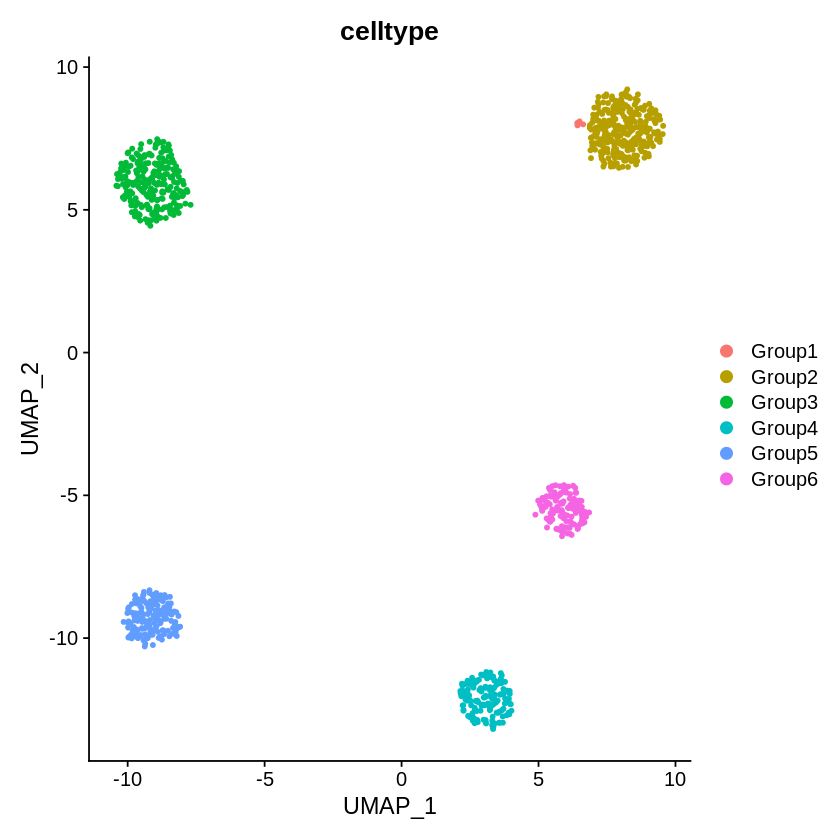

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1500
Number of edges: 49445

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9164
Number of communities: 6
Elapsed time: 0 seconds


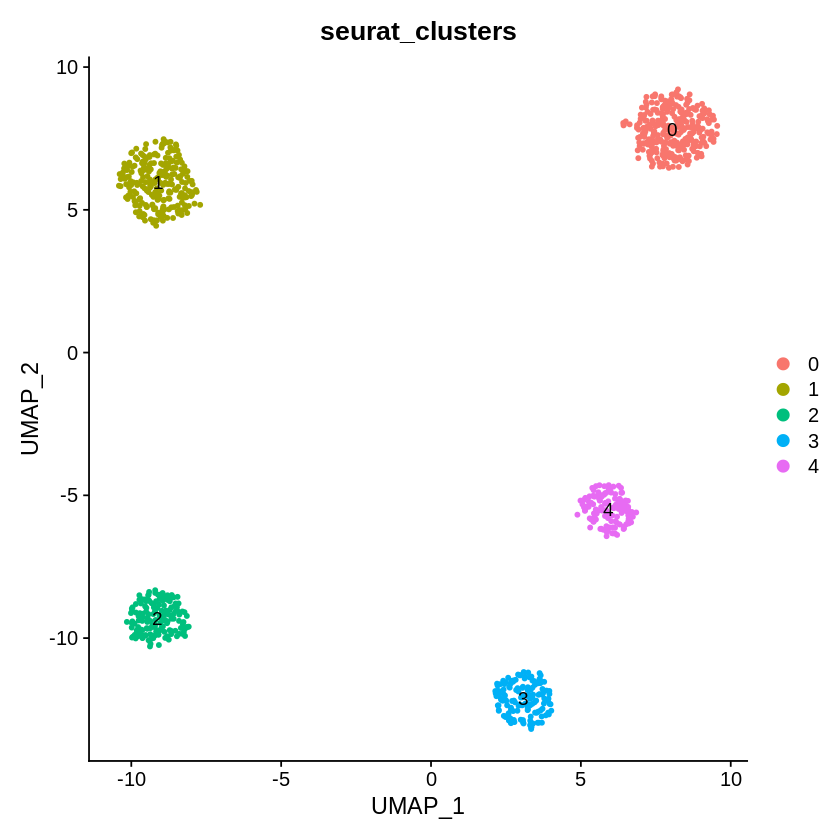

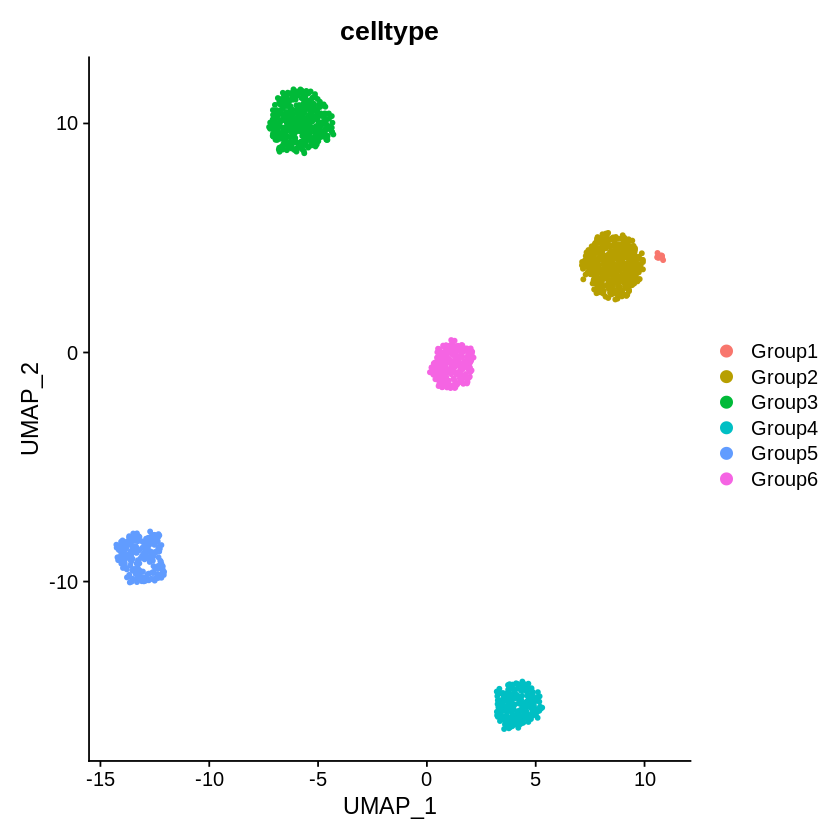

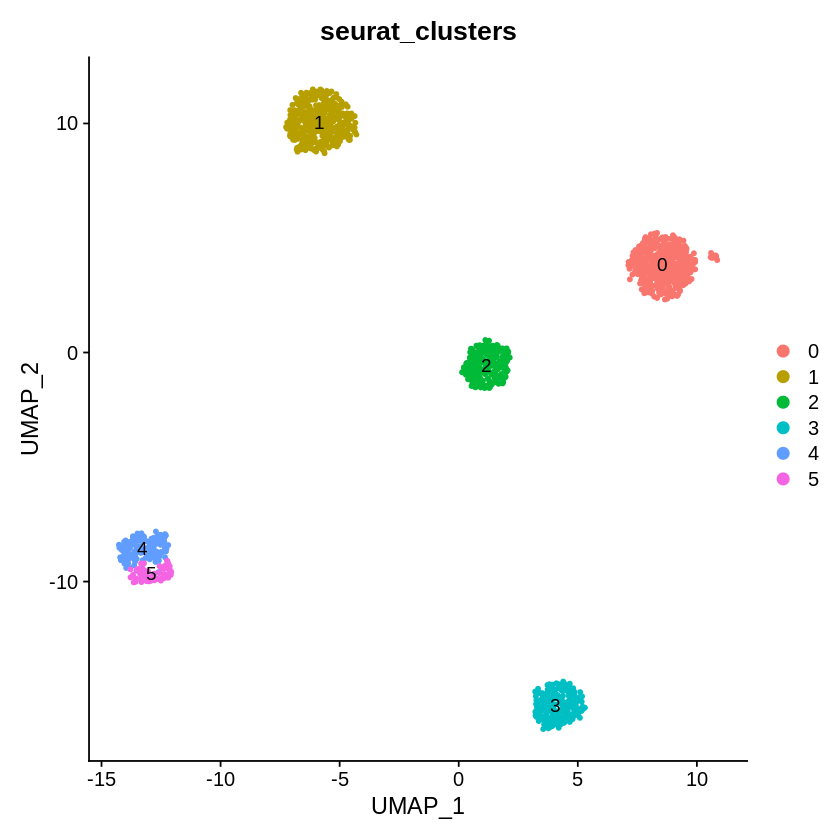

In [44]:
# obj<-CreateSeuratObject(counts=mat1,meta.data=meta)
# VariableFeatures(obj)<-rownames(mat1)
# obj@assays$RNA@scale.data=as.matrix(mat1)
# obj<-RunPCA(obj,npcs=30,verbose=F)
# obj<-RunUMAP(obj,reduction='pca',dims=1:30,verbose=F)
# obj<-FindNeighbors(obj,dims=1:10)
# obj<-FindClusters(obj,resolution=0.4)
# DimPlot(obj,group.by='celltype')
# DimPlot(obj,group.by='seurat_clusters',label=T)
#####
ub=unique(batch[,1])
id=(meta$batch==ub[1])
obj1<-CreateSeuratObject(counts=mat1[,id],meta.data=meta[id,])
VariableFeatures(obj1)<-rownames(mat1[,id])
obj1@assays$RNA@scale.data=as.matrix(mat1[,id])
obj1<-RunPCA(obj1,npcs=30,verbose=F)
obj1<-RunUMAP(obj1,reduction='pca',dims=1:30,verbose=F)
obj1<-FindNeighbors(obj1,dims=1:10)
obj1<-FindClusters(obj1,resolution=0.4)
DimPlot(obj1,group.by='celltype')
DimPlot(obj1,group.by='seurat_clusters',label=T)
####
id=(meta$batch==ub[2])
obj2<-CreateSeuratObject(counts=mat1[,id],meta.data=meta[id,])
VariableFeatures(obj2)<-rownames(mat1[,id])
obj2@assays$RNA@scale.data=as.matrix(mat1[,id])
obj2<-RunPCA(obj2,npcs=30,verbose=F)
obj2<-RunUMAP(obj2,reduction='pca',dims=1:30,verbose=F)
obj2<-FindNeighbors(obj2,dims=1:10)
obj2<-FindClusters(obj2,resolution=0.4)
DimPlot(obj2,group.by='celltype')
DimPlot(obj2,group.by='seurat_clusters',label=T)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2500
Number of edges: 147817

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9081
Number of communities: 6
Elapsed time: 0 seconds


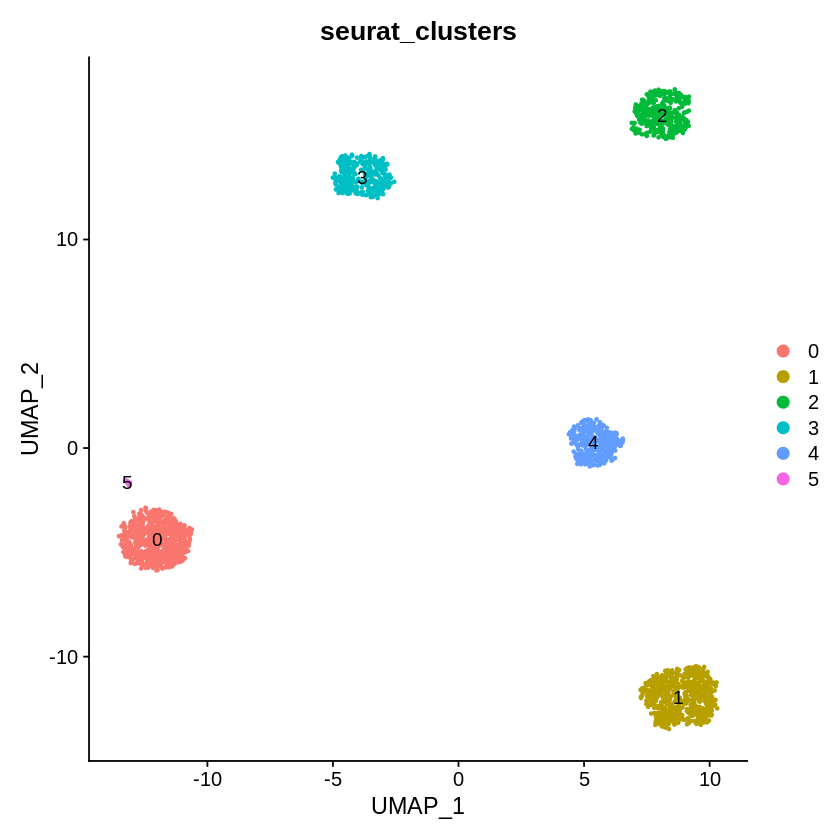

In [36]:
# #####integrate by seurat#####
# obj.list<-SplitObject(obj,split.by="batch")
# obj.anchors<-FindIntegrationAnchors(obj.list, dims = 1:30,k.anchor =5,verbose=F)
# obj.inte<-IntegrateData(anchorset=obj.anchors,dims=1:30,verbose=F,k.weight=100)
# # obj.inte<-ScaleData(obj.inte,verbose=F)
# obj.inte@assays$integrated@scale.data=as.matrix(obj.inte@assays$integrated@data)
# obj.inte<-RunPCA(obj.inte,npcs=30,verbose=F)
# obj.inte<-RunUMAP(obj.inte,reduction="pca",dims=1:30,verbose=F)
# DimPlot(obj.inte,group.by="batch")
# DimPlot(obj.inte,group.by="celltype")

obj.inte<-FindNeighbors(obj.inte,dims=1:30)
obj.inte<-FindClusters(obj.inte,resolution=0.4)
DimPlot(obj.inte,group.by='seurat_clusters',label=T)

In [48]:
####integrate by scidrl####
data=read.table("/data02/tguo/batch_effect/simulate/test_data_2_scidr_1.txt")
data=data[,3:10]
data=t(data)
rownames(data)<-paste('gene-',seq(1,dim(data)[1]),sep='')
colnames(data)<-rownames(meta)
scidr<-CreateSeuratObject(counts=data,meta.data=meta)
VariableFeatures(scidr)<-rownames(data)
# scidr<-ScaleData(scidr,verbose=F)
scidr@assays$RNA@scale.data=data
# scidr<-RunPCA(scidr,npcs=8,verbose=F)
scidr@reductions$pca@cell.embeddings=t(data)
scidr<-RunUMAP(scidr,reduction='pca',dims=1:8,verbose=F)
DimPlot(scidr,group.by="batch")
DimPlot(scidr,group.by="celltype")
scidr<-FindNeighbors(scidr,dims=1:7)
scidr<-FindClusters(scidr,resolution=0.4)
DimPlot(scidr,group.by='seurat_clusters',label=T)

Warning message:
“The following arguments are not used: row.names”


ERROR: Error in (function (cl, name, valueClass) : ‘cell.embeddings’ is not a slot in class “NULL”


In [ ]:
k=4
N_gene=500
    N_sample=c(1000,1500)
    #作为base, 每个gene的分布
    base_mean_rate=20
    base_mean_shape=0.1
    #每个cell的library size
    cell_reads_num=11
    cell_reads_var=0.1
    #极端高表达的gene所占的比例
    outlier=0.001
    ##batch 
    batch_loc=c(0,2)
    batch_scale=c(1,1)
    #每个细胞类型的细胞数量所占的比例
    cell_type_prob=c(0.15,0.15,0.25,0.15,0.15,0.15)
    #每个细胞类型相对于base发生差异表达的基因的比例，用来衡量两个type的差异
    gene_diff_prob=c(0.1,0.1,0.7,0.8,0.6,0.9)
    #gene_down_prob=c(0.5,0.3,0.1)
    gene_diff_loc=c(5,5,10,15,20,25)
    gene_diff_scale=c(1,1,1,1,1,1)
    #发生drop out的概率
    drop_mid=0
    drop_shape=-5

    params <- newSplatParams()
    params<- setParams(params,update = list(nGenes = N_gene, mean.rate = base_mean_rate, mean.shape=base_mean_shape, batchCells = N_sample,
                                           lib.loc=cell_reads_num, lib.scale=cell_reads_var, lib.norm=FALSE,out.prob=outlier,batch.facLoc=batch_loc,
                                            batch.facScale=batch_scale,group.prob = cell_type_prob, de.prob=gene_diff_prob, de.facLoc=gene_diff_loc, 
                                            de.facScale=gene_diff_scale,dropout.type="experiment", dropout.mid=drop_mid, dropout.shape=drop_shape))
    sim<-splatSimulate(params, verbose = FALSE, method="groups")
    sim1 <- normalize(sim)
    mat<-counts(sim)
    group<-sim$Group
    batch<-sim$Batch
#     plotPCA(sim1, colour_by = "Group", shape_by = "Batch")
    # #normalize
    id_g<-c()
    for(i in 1:length(mat[,1])){
        x=which(mat[i,]==0)
         if(length(x)>10) id_g<-c(id_g, i)
     }
     id_c<-c()
     for(i in 1:length(mat[1, ])){
        x=which(mat[,i]==0)
         if(length(x)>200) id_c<-c(id_c, i)
     }
     mat1<-mat[id_g, id_c]
     mat1<-log(mat1+1)
     group<-group[id_c]
     batch<-batch[id_c]

     write.table(mat1, paste("/data02/tguo/batch_effect/simulate/express_",k,"-2.txt",sep=""), col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
     write.table(group, paste("/data02/tguo/batch_effect/simulate/celltype_",k,"-2.txt",sep=""), col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
     write.table(unclass(as.factor(batch)), paste("/data02/tguo/batch_effect/simulate/batch_",k,"-2.txt",sep=""), col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")
    write.table(batch, paste("/data02/tguo/batch_effect/simulate/batch_",k,"_seurat-2.txt",sep=""), col.names=FALSE, row.names=FALSE, quote=FALSE, sep="\t")


In [3]:
mat1=read.table( "/data02/tguo/batch_effect/simulate/express_1-1.txt", stringsAsFactors=F)
celltype=read.table( "/data02/tguo/batch_effect/simulate/celltype_1-1.txt", stringsAsFactors=F)[,1]
batch=read.table("/data02/tguo/batch_effect/simulate/batch_1_seurat-1.txt", stringsAsFactors=F)[,1]
data<-mat1
######筛选细胞#######
data1<-mat1[,which(batch=="Batch1")]
celltype1<-celltype[which(batch=="Batch1")]
batch1<-batch[which(batch=="Batch1")]
data2<-mat1[,which(batch=="Batch2")]
celltype2<-celltype[which(batch=="Batch2")]
batch2<-batch[which(batch=="Batch2")]
###
id1<-which((celltype1=='Group1')|(celltype1=='Group2')|(celltype1=='Group3')|(celltype1=='Group4'))
# id1<-which((celltype1=='Group1')|(celltype1=='Group4')|(celltype1=='Group2'))
data1<-data1[,id1]
celltype1<-celltype1[id1]
batch1<-batch1[id1]
id2<-which((celltype2=='Group3')|(celltype2=='Group5')|(celltype2=='Group6'))
# id2<-which((celltype2=='Group1')|(celltype2=='Group3')|(celltype2=='Group5')|(celltype2=='Group6'))
data2<-data2[,id2]
celltype2<-celltype2[id2]
batch2<-batch2[id2]
data<-cbind(data1,data2)
celltype<-c(celltype1,celltype2)
batch<-c(batch1,batch2)

rownames(data)<-paste("Gene",seq(1,length(data[,1])),sep="")

# #####cluster distance####

# celltype1=paste("batch1_",celltype1,sep="")
# celltype2=paste("batch2_",celltype2,sep="")
# celltype=c(celltype1,celltype2)
# data_pca=prcomp(t(data))
# dis=dist(data_pca$x[,1:30],method = "euclidean", diag = FALSE, upper = FALSE, p = 2)
# dis=as.matrix(dis)
# cc=unique(celltype)
# N=length(cc)
# dis_clust=matrix(0,ncol=N,nrow=N)
# for(i in 1:(N-1)){
#     for(j in (i+1):N){
#         id1=which(celltype==cc[i])
#         id2=which(celltype==cc[j])
#         dis_clust[i,j]=mean(dis[id1,id2])
#         dis_clust[j,i]=mean(dis[id1,id2])
#     }
# }
# rownames(dis_clust)=cc
# colnames(dis_clust)=cc
# name1=cc[grepl("batch1",cc)]
# name2=cc[grepl("batch2",cc)]
# dis1=dis_clust[name1,name2]
# j=order(dis1)%/%dim(dis1)[1]+1
# i=order(dis1)%%dim(dis1)[1]
# j[which(j>dim(dis1)[2])]=dim(dis1)[2]
# i[which(i==0)]=dim(dis1)[1]
# labels=c()
# N1=rownames(dis1)[i]
# N2=colnames(dis1)[j]
# for(k in 1:length(i)){
#     labels=c(labels,paste(N1[k],N2[k],sep="-"))
# }
# write.table(dis1,"/data02/tguo/batch_effect/simulate/dataset1_cluster_distance.txt",row.names=T,col.names=T,quote=F,sep="\t")
# dis1
# l=c()
# uc=unique(celltype)
# for(i in 1:length(uc)){
#     l=c(l,length(which(celltype==uc[i])))
# }
# l

In [29]:
k=4
data=read.table(paste("/data02/tguo/batch_effect/simulate/dataset4-2_1same_group",k,"_data.txt",sep=""), stringsAsFactors=F)
celltype=read.table(paste("/data02/tguo/batch_effect/simulate/dataset4-2_1same_group",k,"_celltype.txt",sep=""), stringsAsFactors=F)
batch=read.table(paste("/data02/tguo/batch_effect/simulate/dataset4-2_1same_group",k,"_batch.txt",sep=""))
data=t(data)

# data=read.table("/data02/tguo/batch_effect/simulate/express_1-1.txt", stringsAsFactors=F)
# celltype=read.table("/data02/tguo/batch_effect/simulate/celltype_1-1.txt", stringsAsFactors=F)
# batch=read.table("/data02/tguo/batch_effect/simulate/batch_1-1.txt", stringsAsFactors=F)

In [1]:
library(dplyr)
library(ggplot2)
library(harmony)
library(cowplot)
library(Seurat)
types=paste("dataset4-2_1same_group",k,sep="")
for(j in 1:1){
# for(k in 1:100){
#     types=paste("dataset",k,"-1_allsame",sep="")
#     mat1=read.table( paste("/data02/tguo/batch_effect/simulate/express_",k,"-1.txt",sep=""), stringsAsFactors=F)
#     celltype=read.table( paste("/data02/tguo/batch_effect/simulate/celltype_",k,"-1.txt",sep=""), stringsAsFactors=F)[,1]
#     batch=read.table(paste("/data02/tguo/batch_effect/simulate/batch_",k,"_seurat-1.txt",sep=""), stringsAsFactors=F)[,1]
#     data<-mat1
    rownames(data)<-paste("Gene",seq(1,length(data[,1])),sep="")
    colnames(data)<-paste("Cell",seq(1,length(data[1,])),sep="")
    meta=data.frame(celltype=celltype[,1],batch=batch[,1])
    rownames(meta)<-colnames(data)
    obj<-CreateSeuratObject(count=data,meta.data=meta)
    obj<-ScaleData(obj)
    VariableFeatures(obj)<-rownames(data)
    obj<-RunPCA(obj,npcs=30,features=rownames(data))
    obj.inte <- RunHarmony(obj, "batch",theta=2)
    obj.inte <-RunUMAP(obj.inte, reduction = "harmony",dims=1:30)
    DimPlot(obj.inte,group.by="batch")
    DimPlot(obj.inte,group.by="celltype")
    write.table(as.data.frame(obj.inte@reductions$harmony@cell.embeddings),paste("/data02/tguo/batch_effect/simulate/",types,"_",j,"_data_harmony.txt",sep=""),col.names=F,row.names=F)
    
#     write.table(obj.inte$celltype,paste("/data02/tguo/batch_effect/simulate/",types,"_celltype_harmony.txt",sep=""),col.names=F,row.names=F,quote=F)
#     x=obj.inte$batch
#     y=unique(x)
#     z=matrix(0,nrow=length(x),ncol=1)
#     for(i in 1:length(y)){
#         z[which(x==y[i]),1]=i-1
#     }
#     write.table(z,paste("/data02/tguo/batch_effect/simulate/",types,"_batch_harmony.txt",sep=""),col.names=F,row.names=F,quote=F,sep="\t")
}
####}



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Rcpp



In [ ]:
library(Seurat)
library(future)
types=paste("dataset4-2_1same_group",k,sep="")
for(j in 1:1){
# for(k in 1:100){
#     types=paste("dataset",k,"-1_allsame",sep="")
#     mat1=read.table( paste("/data02/tguo/batch_effect/simulate/express_",k,"-1.txt",sep=""), stringsAsFactors=F)
#     celltype=read.table( paste("/data02/tguo/batch_effect/simulate/celltype_",k,"-1.txt",sep=""), stringsAsFactors=F)[,1]
#     batch=read.table(paste("/data02/tguo/batch_effect/simulate/batch_",k,"_seurat-1.txt",sep=""), stringsAsFactors=F)[,1]
#     data<-mat1
#     rownames(data)<-paste("Gene",seq(1,length(data[,1])),sep="")
#     options(future.globals.maxSize = 100 * 1024^3)
#     plan("multiprocess", workers = 10)
    rownames(data)<-paste("Gene",seq(1,length(data[,1])),sep="")
    colnames(data)<-paste("Cell",seq(1,length(data[1,])),sep="")
    meta=data.frame(celltype=celltype[,1],batch=batch[,1])
    rownames(meta)<-colnames(data)
    obj<-CreateSeuratObject(count=data,meta.data=meta)
    obj.list<-SplitObject(obj,split.by="batch")
    obj.anchors<-FindIntegrationAnchors(obj.list, dims = 1:30,k.anchor =5,verbose=F)
    obj.inte<-IntegrateData(anchorset=obj.anchors,dims=1:30,verbose=F,k.weight=100)
    obj.inte<-ScaleData(obj.inte,verbose=F)
    obj.inte<-RunPCA(obj.inte,npcs=30,verbose=F)
#     obj.inte<-RunUMAP(obj.inte,reduction="pca",dims=1:30,verbose=F)
#     DimPlot(obj.inte,group.by="batch")
#     DimPlot(obj.inte,group.by="celltype")
    write.table(as.data.frame(obj.inte@assays$integrated@data),paste("/data02/tguo/batch_effect/simulate/",types,"_",j,"_data_seurat.txt",sep=""),col.names=F,row.names=F,quote=F,sep="\t")
    write.table(as.data.frame(obj.inte$celltype),paste("/data02/tguo/batch_effect/simulate/",types,"_celltype_seurat.txt",sep=""),col.names=F,row.names=F,quote=F)
    write.table(as.data.frame(obj.inte$batch),paste("/data02/tguo/batch_effect/simulate/",types,"_batch_seurat.txt",sep=""),col.names=F,row.names=F,quote=F)
#     write.table(obj$celltype,paste("/data02/tguo/batch_effect/simulate/",types,"_celltype_seurat.txt",sep=""),col.names=F,row.names=F,quote=F,sep="\t")
#     x=obj$batch
#     y=unique(x)
#     z=matrix(0,nrow=length(x),ncol=1)
#     for(i in 1:length(y)){
#         z[which(x==y[i]),1]=i-1
#     }
#     write.table(z,paste("/data02/tguo/batch_effect/simulate/",types,"_batch_seurat.txt",sep=""),col.names=F,row.names=F,quote=F,sep="\t")
# ###}
    }

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...



In [54]:
library(ggplot2)
library(liger)
types=paste("dataset4-2_1same_group",k,sep="")
for(j in 1:5){
    # for(k in 1:100){
    #     types=paste("dataset",k,"-1_allsame",sep="")
    #     mat1=read.table( paste("/data02/tguo/batch_effect/simulate/express_",k,"-1.txt",sep=""), stringsAsFactors=F)
    #     celltype=read.table( paste("/data02/tguo/batch_effect/simulate/celltype_",k,"-1.txt",sep=""), stringsAsFactors=F)[,1]
    #     batch=read.table(paste("/data02/tguo/batch_effect/simulate/batch_",k,"_seurat-1.txt",sep=""), stringsAsFactors=F)[,1]
    #     data<-mat1
    #     rownames(data)<-paste("Gene",seq(1,length(data[,1])),sep="")
    id1<-which(batch==0)
    id2<-which(batch==1)
    data1<-data[,id1]
    data2<-data[,id2]
    celltype<-c(celltype[id1,1],celltype[id2,1])
    batch<-c(batch[id1,1],batch[id2,1])
    obj1<-liger::createLiger(list(dataset1=data1,dataset2=data2))
    obj1@norm.data$dataset1=obj1@raw.data$dataset1
    obj1@norm.data$dataset2=obj1@raw.data$dataset2
    obj1<-liger::selectGenes(obj1)
    obj1<-liger::scaleNotCenter(obj1)
    # labmda.suggest<-liger::suggestLambda(obj1,k=20,num.cores = 10)

    obj1<-liger::optimizeALS(obj1,k=20)
    obj1<-liger::quantileAlignSNF(obj1)
    write.table(as.data.frame(obj1@H.norm),paste("/data02/tguo/batch_effect/simulate/",types,"_",j,"_data_liger.txt",sep=""),col.names=F,row.names=F,quote=F,sep="\t")
}
write.table(celltype,paste("/data02/tguo/batch_effect/simulate/",types,"_celltype_liger.txt",sep=""),col.names=F,row.names=F,quote=F,sep="\t")
write.table(batch,paste("/data02/tguo/batch_effect/simulate/",types,"_batch_liger.txt",sep=""),col.names=F,row.names=F,quote=F,sep="\t")


[1] "Removing 299 genes not expressing in dataset1."
[1] "Removing 345 genes not expressing in dataset2."
  |======================================================================| 100%
Finished in 2.206088 mins, 30 iterations.
Max iterations set: 30.
Final objective delta: 0.0002199569.
Best results with seed 1.


Warning message:
“This is a deprecated function. Calling 'quantile_norm' instead. Note that not all parameters can be passed to 'quantile_norm'. It's suggested to run 'louvainCluster' subsequently as well.”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' val

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

[1] "Removing 299 genes not expressing in dataset1."
[1] "Removing 345 genes not expressing in dataset2."
  |======================================================================| 100%
Finished in 1.844406 mins, 30 iterations.
Max iterations set: 30.
Final objective delta: 0.0002199569.
Best results with seed 1.


Warning message:
“This is a deprecated function. Calling 'quantile_norm' instead. Note that not all parameters can be passed to 'quantile_norm'. It's suggested to run 'louvainCluster' subsequently as well.”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' val

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

[1] "Removing 299 genes not expressing in dataset1."
[1] "Removing 345 genes not expressing in dataset2."
  |======================================================================| 100%
Finished in 2.329299 mins, 30 iterations.
Max iterations set: 30.
Final objective delta: 0.0002199569.
Best results with seed 1.


Warning message:
“This is a deprecated function. Calling 'quantile_norm' instead. Note that not all parameters can be passed to 'quantile_norm'. It's suggested to run 'louvainCluster' subsequently as well.”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' val

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

[1] "Removing 299 genes not expressing in dataset1."
[1] "Removing 345 genes not expressing in dataset2."
  |======================================================================| 100%
Finished in 2.488447 mins, 30 iterations.
Max iterations set: 30.
Final objective delta: 0.0002199569.
Best results with seed 1.


Warning message:
“This is a deprecated function. Calling 'quantile_norm' instead. Note that not all parameters can be passed to 'quantile_norm'. It's suggested to run 'louvainCluster' subsequently as well.”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' val

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

[1] "Removing 299 genes not expressing in dataset1."
[1] "Removing 345 genes not expressing in dataset2."
  |======================================================================| 100%
Finished in 2.040778 mins, 30 iterations.
Max iterations set: 30.
Final objective delta: 0.0002199569.
Best results with seed 1.


Warning message:
“This is a deprecated function. Calling 'quantile_norm' instead. Note that not all parameters can be passed to 'quantile_norm'. It's suggested to run 'louvainCluster' subsequently as well.”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' val

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps